# Lecture 8:  A bare bones overview of classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

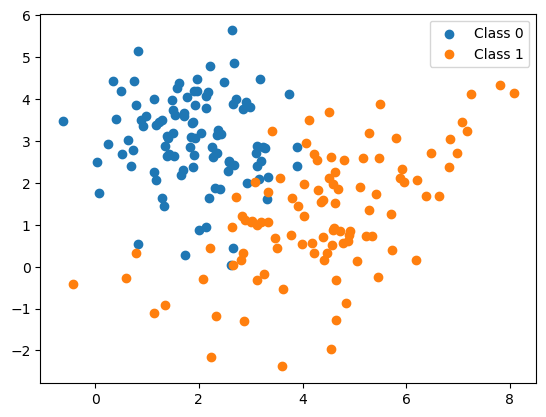

In [2]:
# Making some data with two features and one binary outcome.  Our goal is to predict the outcome.

X0 = np.random.multivariate_normal([2,3], [[1,0],[0,1]], 100)
X1 = np.random.multivariate_normal([4,1], [[2,1],[1,2]], 100)
X = np.concatenate([X0,X1])
y = np.concatenate([np.zeros(100),np.ones(100)])

plt.scatter(X0[:,0],X0[:,1], label = 'Class 0')
plt.scatter(X1[:,0],X1[:,1], label = 'Class 1')
plt.legend()
plt.show()

In [3]:
# Importing the tools we need.  We will use a training/validation/testing split for simplicity.
# Only testing two models, no hyperparameter tuning.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
# Stratify with respect to y so train/test respects class distribution.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=216)

In [5]:
X_tt, X_val, y_tt, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=216)

In [6]:
# Fitting the models.

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tt, y_tt)

log_reg = LogisticRegression(penalty=None)
log_reg.fit(X_tt, y_tt)

LogisticRegression(penalty=None)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
# Comparing accuracy on the validation set.
accuracy_score(y_val, knn.predict(X_val)), accuracy_score(y_val, log_reg.predict(X_val))

(0.96875, 0.90625)

In [14]:
confusion_matrix(y_val, log_reg.predict(X_val))

array([[14,  2],
       [ 1, 15]])

In [9]:
# Training the best model on the entire training set.
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
# Final sanity check on the test data.
accuracy_score(y_test, knn.predict(X_test))

0.975